## **Machine Learning Lab Test | Aaqib Ahmad (1947101)**
- Write python code using sklearn library to compare the performnace of KNN classification with logistic regression. Identify and reduce/eliminate  if any overfitting is observed using suitable correction measures. The code should also include
1. Suitable methods of data exploration to describe the data. 
2. Relevant plot/image to visualize the obtained results. 
3. Provide conceptual interpretation of the results.
4. Use winequality-white dataset for the experimentation.

### **Loading the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


### **Importing Librabries**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [42]:
import io
df = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']))
# Dataset is now stored in a Pandas Dataframe

### **Dataset Exploration, Various Visualization**

In [43]:
df.head() #To find the Top 5 Entries of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality(class)
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
df.describe() # Tells the 5 Point Summary of the Dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality(class)
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f492853d2b0>,
      dtype=object)

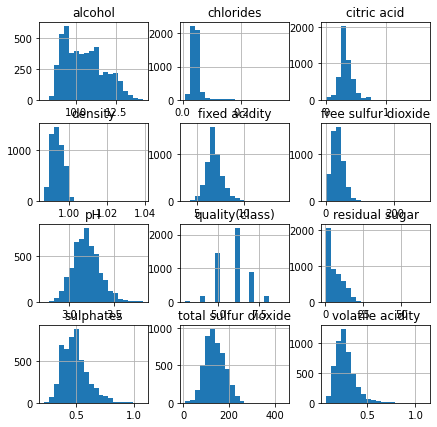

In [46]:
# Histograms
df.hist(bins=20,figsize=(7, 7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49283939b0>,
      dtype=object)

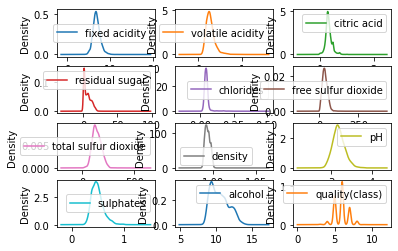

In [47]:
# Density
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)

- Data distribution for attribute “alcohol” is positively skewed.
- For attribute “density” data quite normally distributed. 
- The wine quality data distribution is a bimodal distribution and there are more wines with average quality than wines with ‘good’ or ‘bad’ quality.

In [48]:
df.isnull().sum() #Checking for the Null Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality(class)          0
dtype: int64

**We do not see any Null Values to be Present. Hence dataset looks clean.**

In [49]:
df.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality(class)          0.155796
dtype: float64

In [50]:
wd_group = df.groupby(['quality(class)']).mean()
wd_group

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality(class),,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [51]:
qlty=df['quality(class)'].groupby(df['quality(class)']).count()
print(qlty)

quality(class)
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality(class), dtype: int64


Here, we can see wine data is skewed, quality 5,6 and 7 in majority.

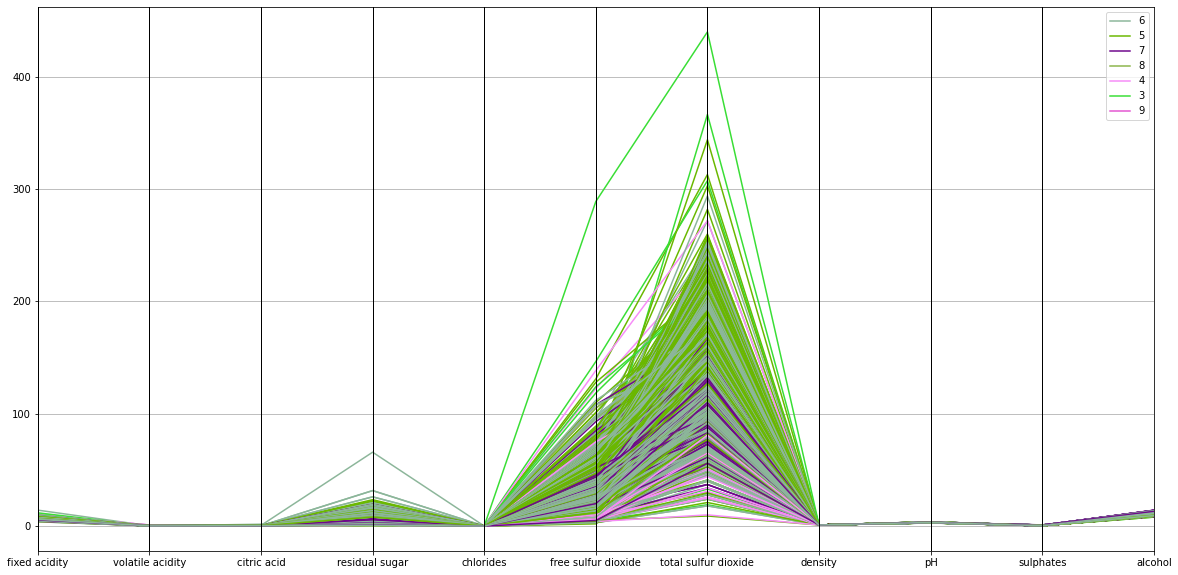

In [60]:
# Using Parallel Coordinates Representation

from pandas.plotting import parallel_coordinates
#df.columns
plt.figure(figsize=(20,10))
parallel_coordinates(df, "quality(class)")

I have used the Parallel Coordinates Plots, each feature on a separate column & then draws lines connecting the features for each data sample


Text(0.5, 1.0, 'Correlation Between Features')

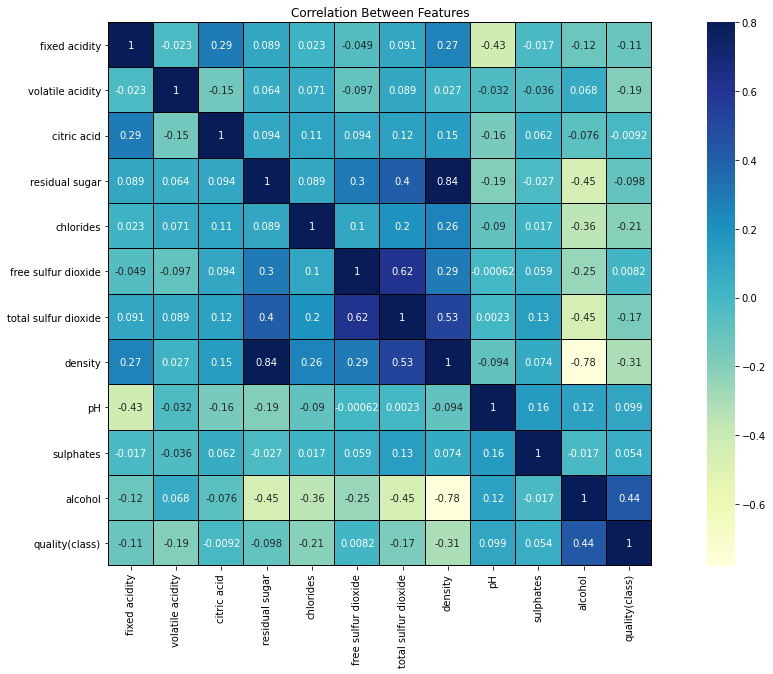

In [61]:
# Correlation Matrix using Seaborn
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation Between Features')

- Here, we can find a negative correlation of **Alcohol** with Density, SO2 and Sugar (Residual).

- Also we find that the **Total Amount of SO2** is Positively Coorelated with **Free SO2.**

- With high corelation we face redundancy issues.

### KNN Model , Logistic Regression - Where Data is **Not Cleaned for Outliers and Quality of Prediction (Poor / Good / Excellent) Not Defined**

#### **KNN Implementation**

- (a) Instantiate K nearest neighbour Classifier
- (b) Fitting of the Model
- (c) Using the Model for the Prediction
- (d) Evaluation of the Model and Getting the Accuracy Score

In [63]:
#Ignore the Type column data
temp_wine = df.loc[:,df.columns != 'Type']
temp_wine.skew()
#label quality column
label = temp_wine.pop('quality(class)')

In [106]:
# Train-Test split 
from sklearn.model_selection import train_test_split
#data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

#check for data_train and date test
print('There are {} Samples in the Training Set and {} Samples in the Test Set'.format(data_train.shape[0], data_test.shape[0]))
print()

There are 3918 Samples in the Training Set and 980 Samples in the Test Set



In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

In [108]:
knn.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [109]:
y_preds = knn.predict(data_test)

In [110]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy Score for the KNN model:', knn_accuracy)

Accuracy Score for the KNN model: 0.5010204081632653


 **Seeing different (n) values to see if the Accuracy Increases**

Accuracy score for the KNN model with n_neighbors = 2  :  0.5010204081632653
Accuracy score for the KNN model with n_neighbors = 3  :  0.49183673469387756
Accuracy score for the KNN model with n_neighbors = 4  :  0.49183673469387756
Accuracy score for the KNN model with n_neighbors = 5  :  0.4826530612244898
Accuracy score for the KNN model with n_neighbors = 6  :  0.4602040816326531
Accuracy score for the KNN model with n_neighbors = 7  :  0.45510204081632655
Accuracy score for the KNN model with n_neighbors = 8  :  0.45918367346938777
Accuracy score for the KNN model with n_neighbors = 9  :  0.45816326530612245
Accuracy score for the KNN model with n_neighbors = 10  :  0.4663265306122449
Accuracy score for the KNN model with n_neighbors = 11  :  0.45816326530612245
Accuracy score for the KNN model with n_neighbors = 12  :  0.44285714285714284
Accuracy score for the KNN model with n_neighbors = 13  :  0.4326530612244898


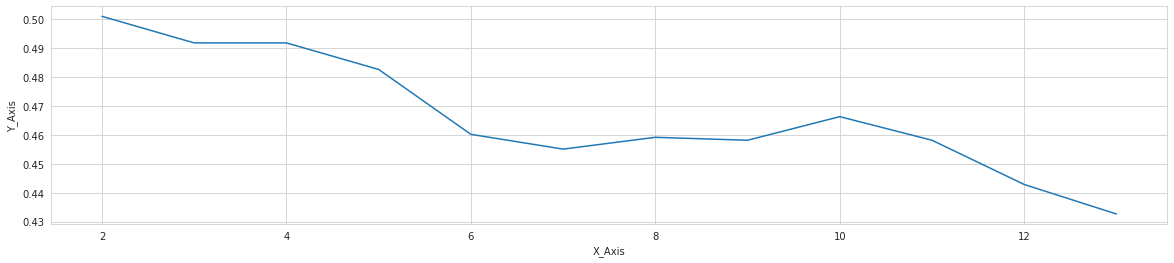

In [97]:
#Check for different neighbours from 2 to 13
xAxis = list()
yAxis = list()
for i in range(2,14,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(knn_accuracy)
  print('Accuracy score for the KNN model with n_neighbors =', i," : ",knn_accuracy)

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(20,4))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

#store the max accuracy of the KNN model
knn_accuracy = max(yAxis)
#sinplot()

#### **Modelling and Prediction using Logistic Regression**

- (a) Instantiate Logistic Regression
- (b) Fit the model
- (c) Use the model for prediction
- (d) Model Evaluation using Accuracy score

In [98]:
#Instantiating the Logistic Regression

from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

In [99]:
#Fit the model

logis.fit(data_train, label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#Model Prediction

y_pred = logis.predict(data_test)

In [101]:
#Model Evaluation using Accuracy score

from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic Regression Model:', logit_accuracy)

Accuracy score for the Logistic Regression Model: 0.45918367346938777


#### **Model Comparison using Accuracy Score**

In [105]:
models = pd.DataFrame({
        'ModelName'         : ['KNN and LR for White_Wine'],
        'Logistic Regression_Score'       : [logit_accuracy],
        'KNN_Score'         : [knn_accuracy],    
    })
models.sort_values(by='ModelName', ascending=True)

,ModelName,Logistic Regression_Score,KNN_Score
0,KNN and LR for White_Wine,0.459184,0.50102


**Note**: Right Now I have **Not Cleaned the data for Outliers**

### KNN Model , Logistic Regression - Where Data is **Cleaned for Outliers and Quality of Prediction (Poor / Good / Excellent) Defined**

#### **Cleaning the WHITE_WINE DATA for Outliers and Running the Models**

In [111]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white (1).csv


In [115]:
import io
df_2 = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']))
# Dataset is now stored in a Pandas Dataframe

Removing Outliers

In [125]:
#check for volume of outliers for total sulfur dioxide
colname = "total sulfur dioxide"
outliervalue = 260.0

TotalWines = df_2[colname].count()
TotalActWines = TotalWines
print(TotalWines)

TotalOutliers = df_2[colname][df_2[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalWines*100,2))


whitewine_datacleaned = df_2[df_2[colname]<=outliervalue].copy()
print("After clean count =",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage =",round((TotalWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalWines*100,2))

print('---------------------------------------------------')

#check for volume of outliers for sulphates

colname = "sulphates"
outliervalue = 0.7

TotalWines = df_2[colname].count()
TotalActWines = TotalWines
print(TotalWines)

TotalOutliers = df_2[colname][df_2[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage =",round(TotalOutliers/TotalWines*100,2))


whitewine_datacleaned = df_2[df_2[colname]<=outliervalue].copy()
print("After clean count =",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage =",round((TotalWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalWines*100,2))

print('--------------------')

#check for volume of outliers for sulphates

colname = "residual sugar"
outliervalue = 25.0

TotalWines = df_2[colname].count()
TotalActWines = TotalWines
print(TotalWines)

TotalOutliers = df_2[colname][df_2[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage =",round(TotalOutliers/TotalWines*100,2))


whitewine_datacleaned = df_2[df_2[colname]<=outliervalue].copy()
print("After clean count =",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage =",round((TotalWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalWines*100,2))

print('--------------------')



4898
10
total sulfur dioxide - outliers percentage= 0.2
After clean count = 4888
Removal percentage = 0.2
---------------------------------------------------
4898
247
sulphates - outliers percentage = 5.04
After clean count = 4651
Removal percentage = 5.04
--------------------
4898
5
residual sugar - outliers percentage = 0.1
After clean count = 4893
Removal percentage = 0.1
--------------------


In [143]:
#Running with Cleaned Data
wine_data = whitewine_datacleaned


#create the 3 new category
wine_data['quality-class'] = wine_data.apply(lambda x: 1 if x['quality(class)'] <= 3 else 2 if (x['quality(class)'] > 3 and x['quality(class)'] <= 6) else 3,axis=1)
print('qualityclass created with 3 categories 1 -poor,2 - good and 3 - excellent values')

# Using StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Remove type after dummification
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,wine_data.columns != 'quality']

#Label the qualityclass column
label = temp_wine.pop('quality-class')
print('qualityclass label created')


sc.fit(temp_wine)                                                                                 # fit the data to Standardscaler

#wine_scale = temp_wine.copy()
wine_scale = sc.transform(temp_wine)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(wine_scale, columns=temp_wine.columns).head())

qualityclass created with 3 categories 1 -poor,2 - good and 3 - excellent values
qualityclass label created
After standardizing our features, the first 5 rows of our data now look like this:

   fixed acidity  volatile acidity  ...   alcohol  quality(class)
0       0.172794         -0.079862  ... -1.393471        0.137942
1      -0.656748          0.219268  ... -0.824605        0.137942
2       1.476359          0.019848  ... -0.337005        0.137942
3       0.409806         -0.478702  ... -0.499538        0.137942
4       0.409806         -0.478702  ... -0.499538        0.137942

[5 rows x 12 columns]


In [135]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)
#data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 3914 samples in the training set and 979 samples in the test set


#### Modelling and Prediction for KNN


In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation
print('Instantiated the KNN model.')

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Instantiated the KNN model.
Accuracy score for the KNN model: 0.9734422880490297


In [137]:
# Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_preds))

confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
print(confusion_matrix)

                  Predicted Poor  Predicted Good  Predicted Excellent
Actual Poor                    0               3                    0
Actual Good                    0             757                    1
Actual Excellent               0              22                  196


Accuracy score for the KNN model with n_neighbors= 4 : 0.9632
Accuracy score for the KNN model with n_neighbors= 5 : 0.9724
Accuracy score for the KNN model with n_neighbors= 6 : 0.9694
Accuracy score for the KNN model with n_neighbors= 7 : 0.9734
Accuracy score for the KNN model with n_neighbors= 8 : 0.9694
Accuracy score for the KNN model with n_neighbors= 9 : 0.9734
Accuracy score for the KNN model with n_neighbors= 10 : 0.9663
Accuracy score for the KNN model with n_neighbors= 11 : 0.9714
Accuracy score for the KNN model with n_neighbors= 12 : 0.9683
Accuracy score for the KNN model with n_neighbors= 13 : 0.9714
Accuracy score for the KNN model with n_neighbors= 14 : 0.9673


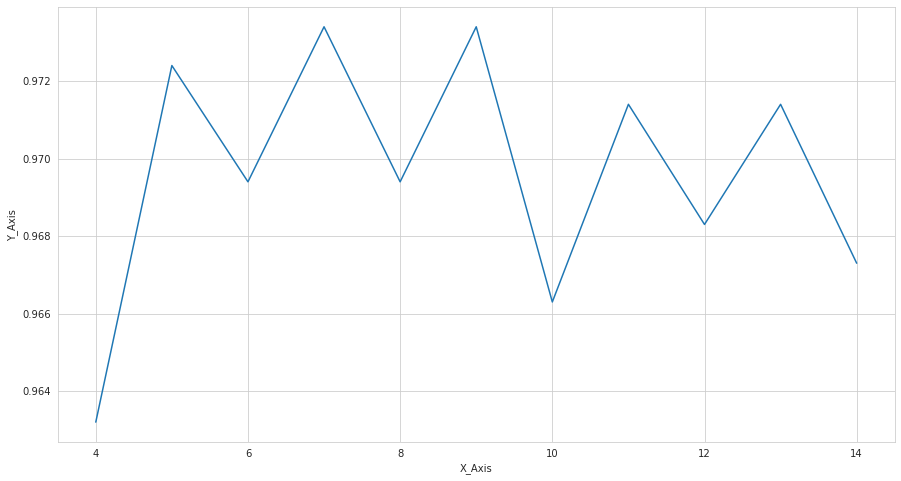

In [139]:
#TRYING DIFFERENT NEIGHBOURS
#Check for different neighbours from 4 to 15
xAxis = list()
yAxis = list()
for i in range(4,15,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') #p=2 ,Euclidean distance calculation

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

#### Modelling and Prediction for Logistic Regression


In [140]:
#Instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the model
logis.fit(data_train, label_train)

#Use the model for prediction
y_pred = logis.predict(data_test)
print("Instantiated logistic regression, fit the model and complete prediction")

Instantiated logistic regression, fit the model and complete prediction


In [141]:
#Model evaluation using Accuracy score

from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.9989785495403473


In [142]:
#Model evaluation using confustion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(label_test, y_pred))

confusion_matrix.index = ['Actual Poor','Actual Good','Actual Excellent']
confusion_matrix.columns = ['Predicted Poor','Predicted Good','Predicted Excellent']
print(confusion_matrix)

                  Predicted Poor  Predicted Good  Predicted Excellent
Actual Poor                    2               1                    0
Actual Good                    0             758                    0
Actual Excellent               0               0                  218


#### **Model Comparison using Accuracy Score**

In [154]:
models = pd.DataFrame({
        'ModelName'         : ['KNN and LR for White_Wine'],
        'Logistic Regression_Score'       : [logit_accuracy],
        'KNN_Score'         : [knn_accuracy],    
        'Outliers?'         : ['No'],
    })
models.sort_values(by='ModelName', ascending=True)

,ModelName,Logistic Regression_Score,KNN_Score,Outliers?
0,KNN and LR for White_Wine,0.998979,0.9734,No


#### Interpretation 

- Results are clear as the both the models are running better we have removed the outliers and overfitting avoidance. 
- LR performs better in Both the Checks (with and without outliers)
- KNN Reaches close to LR but too much of parameters need to be tuned with respect to K-Neighbours.


### Thank You | Aaqib Ahmad